In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import fitsio as ft
import numpy as np

In [2]:
plt.rc('font', size=20)

In [4]:
!ls /home/mehdi/data/eboss/v7_2/0.1/pk*

/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_ablation_lowmidhigh_512_combined.dat
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_ablation_lowmidhigh_512_combined.json
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_ablation_lowmidhigh_512_standard.dat
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_ablation_lowmidhigh_512_standard.json
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_ablation_lowmidhigh_512_zhigh.dat
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_ablation_lowmidhigh_512_zhigh.json
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_known_lowmidhigh_512_combined.dat
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_known_lowmidhigh_512_combined.json
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_known_lowmidhigh_512_standard.dat
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_known_lowmidhigh_512_standard.json
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_known_lowmidhigh_512_zhigh.dat
/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_known_lowmidhigh_512_zhigh.json
/hom

In [18]:
pks = np.loadtxt('/home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_wsystot_512_zhigh.dat')

In [8]:
!head -n 30 /home/mehdi/data/eboss/v7_2/0.1/pk_NGC_v7_2_0.1_wsystot_512_zhigh.dat

#--- Nbodykit parameters ---
# poles                          : [0, 2, 4]
# dk                             : 0.001
# kmin                           : 0.0
# kmax                           : None
# Nmesh                          : [512 512 512]
# BoxSize                        : [3769. 8213. 3084.]
# BoxPad                         : [0.02 0.02 0.02]
# BoxCenter                      : [-2213.7688064     42.21506656  2555.72523382]
# mesh.resampler                 : tsc
# mesh.interlaced                : False
# alpha                          : 0.020452248145527135
# data.norm                      : 0.25333662462827605
# randoms.norm                   : 0.252820029844545
# shotnoise                      : 184838.98081326677
# data.N                         : 46679
# data.W                         : 47524.48160805787
# data.W2                        : 45935.88146689048
# data.num_per_cell              : 0.0003422489871598071
# randoms.N                      : 2375518
# randoms.W            

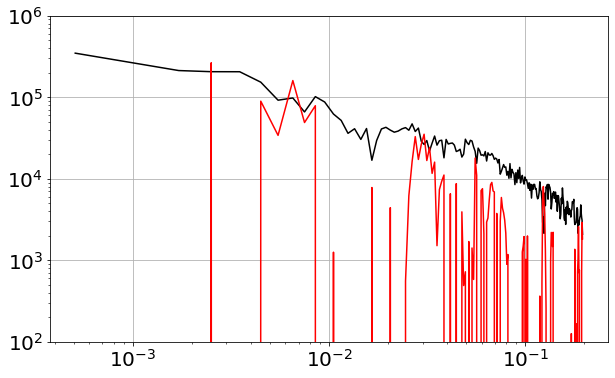

In [24]:
c = ['k', 'r', 'b']
plt.figure(figsize=(10, 6))
for i, iy in enumerate([2, 3]):
    y = pks[:, iy].copy()
    if iy==2:
        y -= 184838.98081326677
    plt.plot(pks[:,1], y, ls='-', color=c[i])
#     if iy==3:
#         plt.plot(pks[:,1], -y, ls='--', color=c[i])
plt.loglog()
plt.ylim(1e2, 1e6)
# plt.xlim(1.e-2, 3.e-1)
plt.grid()

In [6]:
pks.shape

(196, 6)

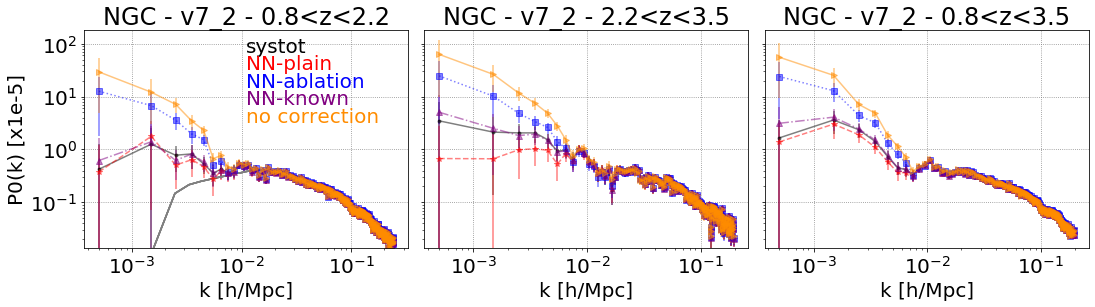

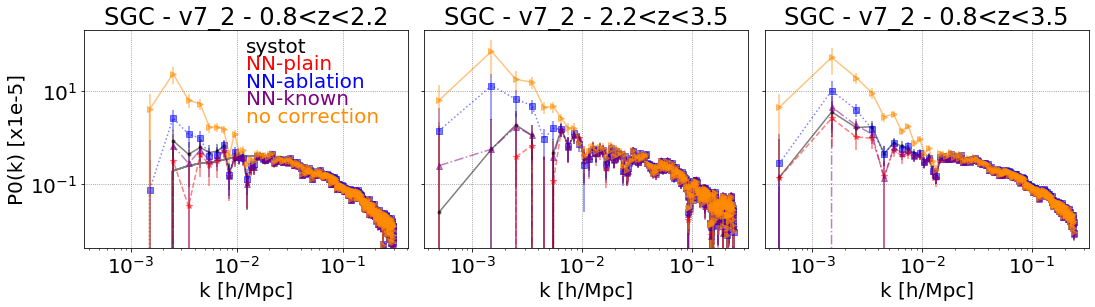

In [33]:
caps    = ['NGC', 'SGC']
samples = ['standard', 'zhigh', 'combined']
ttl     = ['systot',   'NN-plain',  'NN-ablation', 'NN-known', 'no correction']
models  = ['wsystot',  'plain_lowmidhigh', 'ablation_lowmidhigh', 'known_lowmidhigh', 'wosystot']
mk      = ['.', '*', 's', '^', '>', 'o']
c       = ['k', 'r', 'b', 'purple', 'darkorange']
ls      = 2*['-', '--', ':', '-.']
path    = '/home/mehdi/data/eboss/v7_2/0.1/'
pkout   = lambda cap, model, sample : f'pk_{cap}_v7_2_0.1_{model}_512_{sample}.json'
labels  = {'standard':'0.8<z<2.2',
           'zhigh':'2.2<z<3.5',
          'combined':'0.8<z<3.5'} 

for cap in caps:    
    fig, ax = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
    ax = ax.flatten()
    fig.subplots_adjust(wspace=0.05)

    for j, sample in enumerate(samples):

        for i,model in enumerate(models):

            pk_i = nb.ConvolvedFFTPower.load(path + pkout(cap, model, sample))
            err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
            
            ax[j].errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                        yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
            
            if j==0:                
                Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+cap+'_av.txt', usecols=(0, 1))
                ax[j].plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')
                
            if j==0:
                ax[j].text(0.5, 0.9-i*0.08, ttl[i], color=c[i], transform=ax[j].transAxes)

        ax[j].set(yscale='log', xscale='log', 
                 xlabel='k [h/Mpc]',
                  title=f'{cap} - v7_2 - {labels[sample]}')
        if j==0:ax[j].set_ylabel('P0(k) [x1e-5]')
        # ax[j].legend(bbox_to_anchor=(1.,1.))
        ax[j].grid(True, ls=':', color='grey')
        # plt.savefig('kpkv7_1_2z.png', dpi=300, bbox_inches='tight')

In [31]:
pk_i.attrs

{'poles': [0, 2, 4],
 'dk': 0.001,
 'kmin': 0.0,
 'kmax': None,
 'Nmesh': array([512, 512, 512]),
 'BoxSize': array([3405., 6646., 3384.]),
 'BoxPad': array([0.02, 0.02, 0.02]),
 'BoxCenter': array([3035.98386831,   59.45793635, 1103.10401009]),
 'mesh.resampler': 'tsc',
 'mesh.interlaced': False,
 'alpha': 0.019149071617919615,
 'data.norm': 1.9207214409785442,
 'randoms.norm': 1.9091903103625003,
 'shotnoise': 80156.98175570049,
 'data.N': 151487,
 'data.W': 161853.78969533197,
 'data.W2': 149251.15561639052,
 'data.num_per_cell': 0.001112007764103938,
 'randoms.N': 8658242,
 'randoms.W': 8452304.786612732,
 'randoms.W2': 7798273.98155377,
 'randoms.num_per_cell': 0.05810166881646044,
 'data.ext': 1,
 'randoms.ext': 1}

In [7]:
import pandas as pd

In [4]:
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
from LSSutils.catalogs import combinefits as cf

camb is not installed!


In [3]:
LSS.setup_logging("info")

In [9]:
templates = pd.read_hdf('/home/mehdi/data/eboss/sysmaps/SDSS_WISE_HI_imageprop_nside512.h5',key='templates')

In [10]:
templates.head()

,nran,sky_g,sky_r,sky_i,sky_z,airmass,ebv,depth_g,depth_r,depth_i,...,psf_r,psf_i,psf_z,w1_med,w1_covmed,w1_moon,star_density,loghi,run,depth_g_minus_ebv
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.321053,53.861678,0.0,0.0,20.802680,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.247458,56.505509,0.0,0.0,20.787574,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.247467,56.505200,0.0,0.0,20.776386,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.321044,53.861987,0.0,0.0,20.788406,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.324270,53.746094,0.0,0.0,20.805544,NaN,NaN


In [6]:
qso    = cf.EbossCatalog('/home/mehdi/data/eboss/v7_2/eBOSS_QSO_full_NGC_v7_2.dat.fits', kind='galaxy')
random = cf.EbossCatalog('/home/mehdi/data/eboss/v7_2/eBOSS_QSO_full_NGC_v7_2.ran.fits', kind='random')
qsohighz    = cf.EbossCatalog('/home/mehdi/data/eboss/v7_2/eBOSS_QSO_full_NGC_v7_2.dat.fits', kind='galaxy', zmin=2.2, zmax=3.5)
randomhighz = cf.EbossCatalog('/home/mehdi/data/eboss/v7_2/eBOSS_QSO_full_NGC_v7_2.ran.fits', kind='random', zmin=2.2, zmax=3.5)

[ 000271.70 ]   0: 02-13 21:15  EbossCatalog    INFO     compmin : 0.5
[ 000271.70 ]   0: 02-13 21:15  EbossCatalog    INFO     zmin:0.8, zmax:2.2
[ 000271.80 ]   0: 02-13 21:15  EbossCatalog    INFO     218209 galaxies pass the cuts
[ 000271.80 ]   0: 02-13 21:15  EbossCatalog    INFO     % of galaxies after cut 0.54
[ 000273.18 ]   0: 02-13 21:15  EbossCatalog    INFO     compmin : 0.5
[ 000273.18 ]   0: 02-13 21:15  EbossCatalog    INFO     zmin:0.8, zmax:2.2
[ 000274.14 ]   0: 02-13 21:15  EbossCatalog    INFO     11099858 randoms pass the cuts
[ 000274.17 ]   0: 02-13 21:15  EbossCatalog    INFO     % of randoms after cut 0.64
[ 000278.19 ]   0: 02-13 21:15  EbossCatalog    INFO     compmin : 0.5
[ 000278.19 ]   0: 02-13 21:15  EbossCatalog    INFO     zmin:2.2, zmax:3.5
[ 000278.71 ]   0: 02-13 21:15  EbossCatalog    INFO     46679 galaxies pass the cuts
[ 000278.72 ]   0: 02-13 21:15  EbossCatalog    INFO     % of galaxies after cut 0.12
[ 000279.92 ]   0: 02-13 21:15  EbossCata

In [14]:
usemaps = ['star_density', 'ebv', 'psf_i', 'sky_i', 'depth_g_minus_ebv', 'airmass']

In [15]:
from LSSutils.stats.nnbar import NNBAR

In [17]:
from LSSutils.utils import hpixsum

In [22]:
import matplotlib.pyplot as plt
import healpy as hp

In [29]:
LSS.setup_logging("warning")

In [42]:
nside=512
zcuts={'low':[0.8,1.5],
      'high':[1.5,2.2],
      'all':[0.8,2.2],
      'zhigh':[2.2,3.5]}

results= {}



for zcut in zcuts:
    
    if zcut=='zhigh':
        sample=qsohighz
        ransom=randomhighz
    else:
        sample=qso
        ransom=random
        
    
    sample.cutz(zcuts[zcut])
    weight = sample.cdata['WEIGHT_CP']*sample.cdata['WEIGHT_FKP']*sample.cdata['WEIGHT_NOZ']        
    sample.hpmap= hpixsum(nside, sample.cdata['RA'], sample.cdata['DEC'], value=weight*sample.cdata['WEIGHT_SYSTOT'])
    sample.hpmap2 = hpixsum(nside, sample.cdata['RA'], sample.cdata['DEC'], value=weight)

    weight = ransom.data['WEIGHT_CP']*ransom.data['WEIGHT_FKP']*ransom.data['WEIGHT_NOZ']*ransom.data['WEIGHT_SYSTOT']      
    ransom.hpmap = hpixsum(nside, ransom.data['RA'], ransom.data['DEC'], value=weight)
    
    mask  = ransom.hpmap > 0
    
    for mapi in usemaps:
        
        print(zcut, mapi)
        
        sysmap = templates[mapi].values
        
        nnbar = NNBAR(sample.hpmap,
                      ransom.hpmap, 
                      mask, 
                      sysmap, 
                      nbins=5, 
                      binning='equi-area')
        
        nnbar.run()
        results['-'.join((zcut, mapi, 'after'))]=nnbar.output
        
        
        nnbar = NNBAR(sample.hpmap2,
                      ransom.hpmap, 
                      mask, 
                      sysmap, 
                      nbins=5, 
                      binning='equi-area')
        
        nnbar.run()
        results['-'.join((zcut, mapi, 'before'))]=nnbar.output

low star_density
low ebv
low psf_i
low sky_i
low depth_g_minus_ebv
low airmass
high star_density
high ebv
high psf_i
high sky_i
high depth_g_minus_ebv
high airmass
all star_density
all ebv
all psf_i
all sky_i
all depth_g_minus_ebv
all airmass
zhigh star_density
zhigh ebv
zhigh psf_i
zhigh sky_i
zhigh depth_g_minus_ebv
zhigh airmass


In [33]:
results['low-star_density']

{'nnbar': array([0.99961654, 1.02554634, 1.02877456, 0.98501248, 0.96104728]),
 'area': array([2494.00558967, 2494.0279944 , 2494.04618155, 2494.01592255,
        2493.86701311]),
 'nnbar_err': array([0.00606755, 0.00485741, 0.0068035 , 0.0079944 , 0.00726452]),
 'bin_edges': array([  2.25,  15.25,  18.  ,  22.75,  33.  , 127.  ]),
 'attr': {'njack': 20,
  'nbar': 0.010401604220658386,
  'nside': 256,
  'npix2area': 0.0012695251307729102}}

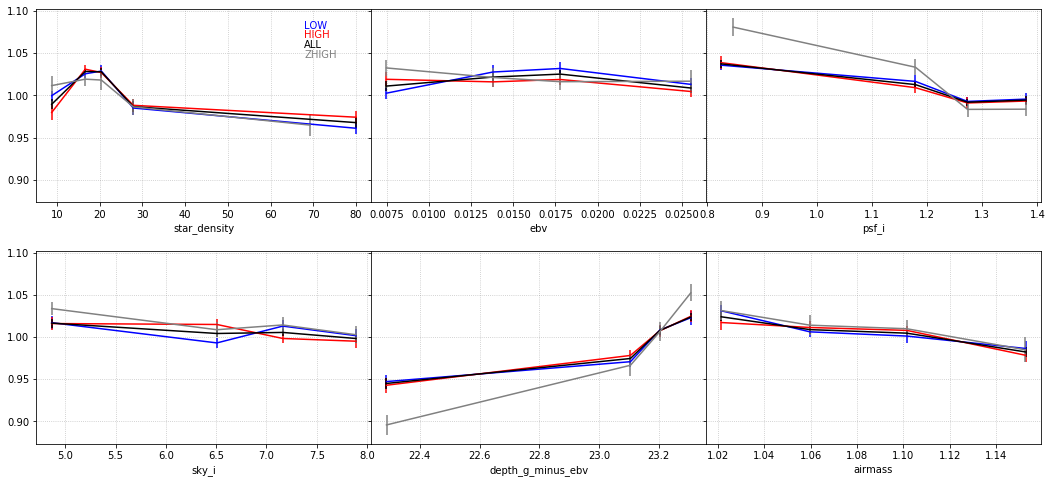

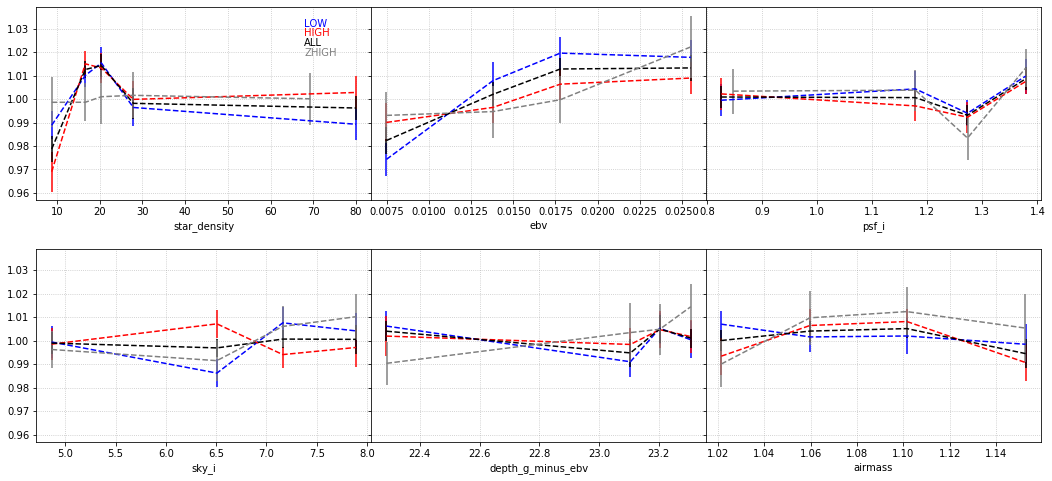

In [56]:
color = {'low':'b',
         'high':'r',
         'all':'k',
         'zhigh':'grey'}
ls = {'before':'-',
      'after':'--'}




for k, wght in enumerate(['before', 'after']):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8),
                          sharey=True)
    fig.subplots_adjust(hspace=0.25, wspace=0.0)
    ax = ax.flatten()

    
    for j,zcut in enumerate(zcuts):
        for i,mapi in enumerate(usemaps):            
            myr=results['-'.join((zcut, mapi, wght))]
            x    = myr['bin_edges']
            xmid = 0.5*(x[1:]+x[:-1])
            y  = myr['nnbar']
            ye = myr['nnbar_err']
#             if wght=='after':ye=0
            ax[i].errorbar(xmid, y, ye, color=color[zcut], ls=ls[wght])
            
            if i==0:
                
                ax[0].text(0.8, 0.9-j*0.05, zcut.upper(), color=color[zcut], transform=ax[0].transAxes)
            if j==0:
                ax[i].set(xlabel=mapi)
                ax[i].grid(True, ls=':', color='grey', alpha=0.5)
plt.show()

In [59]:
id(qso), id(qsohighz)

(139694903967376, 139694902803216)

In [60]:
id?

In [71]:
a = [2, 1]
b = [5, 1]
print(a, b)
print(id(a), id(b))
c = a
c.append(3)
print(a, b, c)
print(id(a), id(b), id(c))

c = b
c.append(3)
print(a, b, c)
print(id(a), id(b), id(c))

[2, 1] [5, 1]
139693850964128 139693849252080
[2, 1, 3] [5, 1] [2, 1, 3]
139693850964128 139693849252080 139693850964128
[2, 1, 3] [5, 1, 3] [5, 1, 3]
139693850964128 139693849252080 139693849252080


In [95]:
!ls /home/mehdi/data/eboss/v7_2/0.1/results/NGC_*_512/regression/nn_plain/nn-weights.hp512.fits

/home/mehdi/data/eboss/v7_2/0.1/results/NGC_all_512/regression/nn_plain/nn-weights.hp512.fits
/home/mehdi/data/eboss/v7_2/0.1/results/NGC_high_512/regression/nn_plain/nn-weights.hp512.fits
/home/mehdi/data/eboss/v7_2/0.1/results/NGC_low_512/regression/nn_plain/nn-weights.hp512.fits
/home/mehdi/data/eboss/v7_2/0.1/results/NGC_zhigh_512/regression/nn_plain/nn-weights.hp512.fits


In [96]:
nnmap = lambda x:f'/home/mehdi/data/eboss/v7_2/0.1/results/NGC_{x}_512/regression/nn_plain/nn-weights.hp512.fits'

In [97]:
import numpy as np

In [98]:
nside=512
zcuts={'low':[0.8,1.5],
      'high':[1.5,2.2],
      'all':[0.8,2.2],
      'zhigh':[2.2,3.5]}


for zcut in zcuts:
    
    if zcut=='zhigh':
        sample=qsohighz
        ransom=randomhighz
    else:
        sample=qso
        ransom=random
        
    
    sample.cutz(zcuts[zcut])
    sample.tohp(nside)
    
    ransom.tohp(nside)
        
    mask  = ransom.hpmap > 0
    
    weight = hp.read_map(nnmap(zcut), verbose=False)
    nan = np.isnan(weight)
    weight[nan] = 1.0
    
    for mapi in usemaps:
        
        print(zcut, mapi)
        
        sysmap = templates[mapi].values
        
        nnbar = NNBAR(sample.hpmap,
                      ransom.hpmap, 
                      mask, 
                      sysmap, 
                      selection=weight,
                      nbins=5, 
                      binning='equi-area')
        
        nnbar.run()
        results['-'.join((zcut, mapi, 'afternnp'))]=nnbar.output

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


low star_density
low ebv
low psf_i
low sky_i
low depth_g_minus_ebv
low airmass
high star_density
high ebv
high psf_i
high sky_i
high depth_g_minus_ebv
high airmass
all star_density
all ebv
all psf_i
all sky_i
all depth_g_minus_ebv
all airmass
zhigh star_density
zhigh ebv
zhigh psf_i
zhigh sky_i
zhigh depth_g_minus_ebv
zhigh airmass


In [92]:
import matplotlib.backends.backend_pdf

In [99]:
pdf = matplotlib.backends.backend_pdf.PdfPages("nnbar_v7_2.pdf")

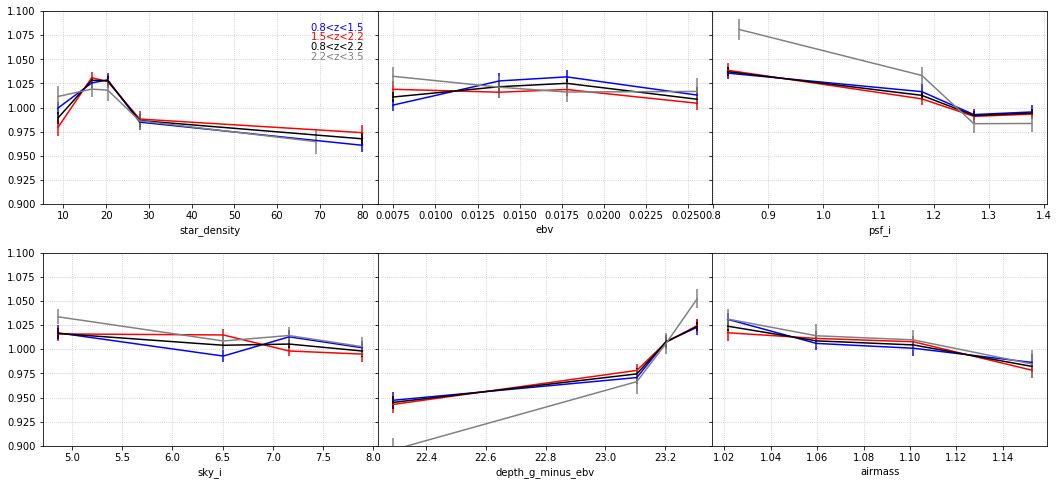

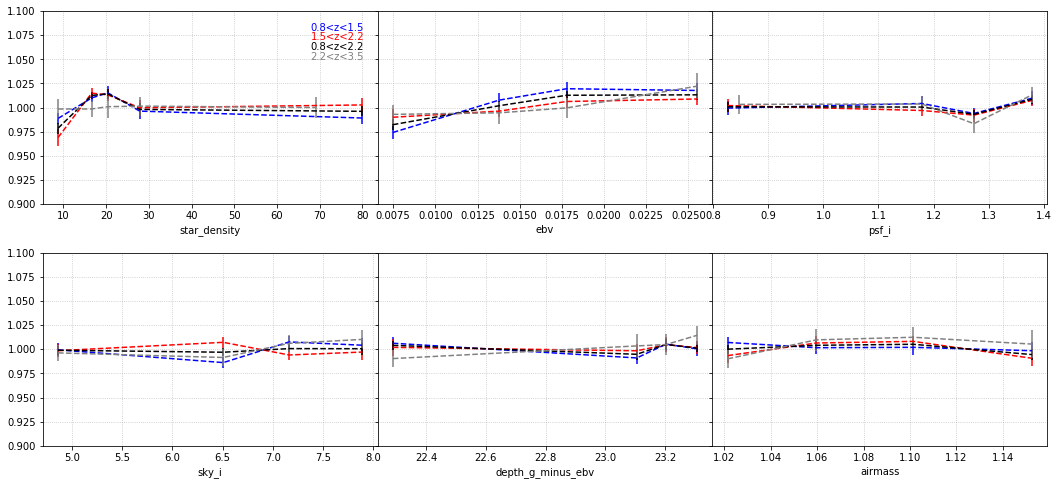

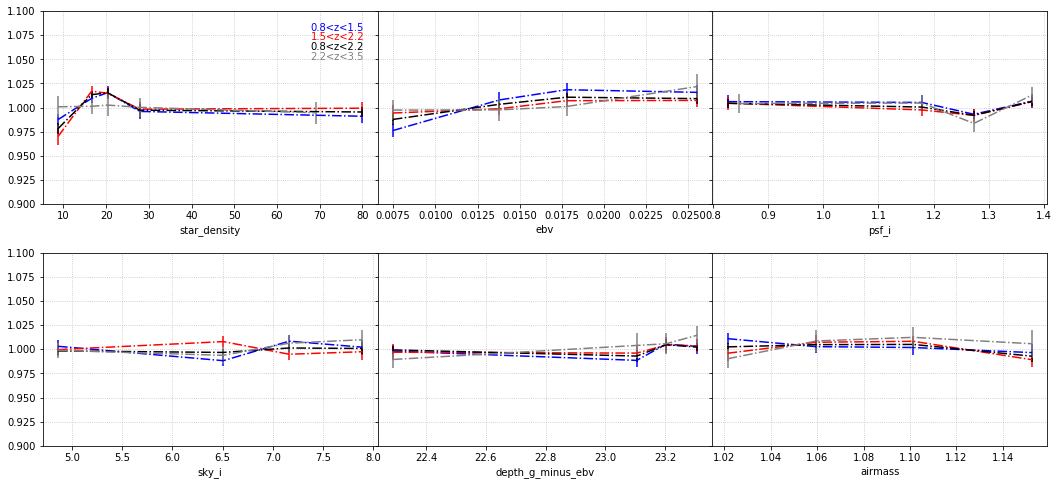

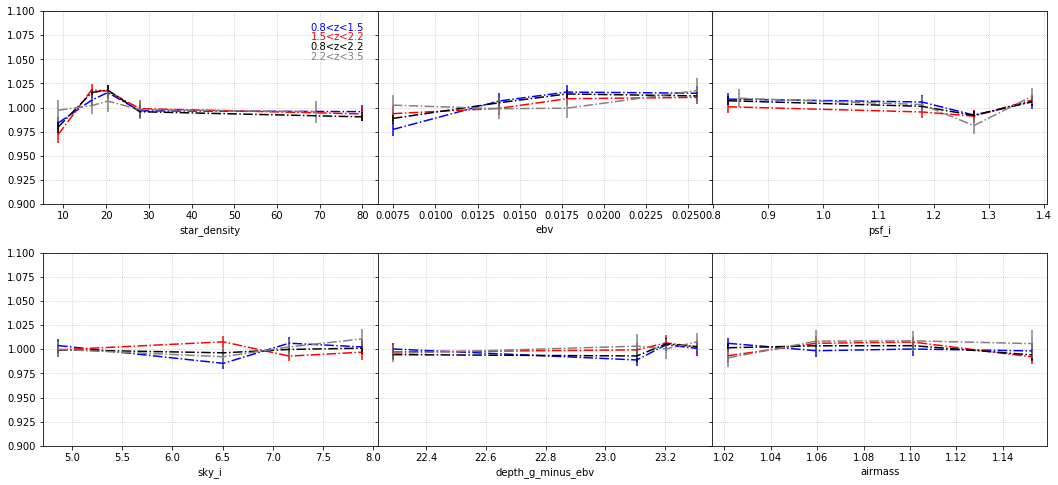

In [100]:
color = {'low':'b',
         'high':'r',
         'all':'k',
         'zhigh':'grey'}

ls = {'before':'-',
      'after':'--',
      'afternn':'-.',
      'afternnp':'-.'}

labels = {'low':'0.8<z<1.5',
         'high':'1.5<z<2.2',
         'all':'0.8<z<2.2',
         'zhigh':'2.2<z<3.5'}


for k, wght in enumerate(['before', 'after', 'afternn', 'afternnp']):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8),
                          sharey=True)
    fig.subplots_adjust(hspace=0.25, wspace=0.0)
    ax = ax.flatten()

    
    for j,zcut in enumerate(zcuts):
        for i,mapi in enumerate(usemaps):            
            myr=results['-'.join((zcut, mapi, wght))]
            x    = myr['bin_edges']
            xmid = 0.5*(x[1:]+x[:-1])
            y  = myr['nnbar']
            ye = myr['nnbar_err']
#             if wght=='after':ye=0
            ax[i].errorbar(xmid, y, ye, color=color[zcut], ls=ls[wght])
            
            if i==0:
                
                ax[0].text(0.8, 0.9-j*0.05, labels[zcut], color=color[zcut], transform=ax[0].transAxes)
            if j==0:
                ax[i].set(xlabel=mapi, ylim=(0.9,1.1))
                ax[i].grid(True, ls=':', color='grey', alpha=0.5)
    pdf.savefig((k+1), bbox_inches='tight')
pdf.close()